In [9]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import matplotlib.pyplot as plt

In [10]:
dataset_path="C:\\Users\\Mayuri\\OneDrive\\Desktop\\DL\\flowers"
img_width,img_height=150,150

In [11]:
datagen=ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2)

In [12]:
train_data=datagen.flow_from_directory(
    os.path.join(dataset_path,'train'),
    class_mode='categorical',
    subset='training',
    batch_size=32,
    target_size=(img_width,img_height)
)

Found 2602 images belonging to 5 classes.


In [13]:
validation_data=datagen.flow_from_directory(
    os.path.join(dataset_path,'test'),
    batch_size=32,
    target_size=(img_width,img_height),
    class_mode='categorical',
    subset='validation'
)

Found 104 images belonging to 5 classes.


In [15]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(img_width,img_height,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(5,activation='softmax')
])

In [16]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
history=model.fit(train_data,validation_data=validation_data,epochs=10)

Epoch 1/10


C:\Users\Mayuri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 70s 818ms/step - accuracy: 0.3655 - loss: 2.0583 - val_accuracy: 0.4904 - val_loss: 1.2362
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 82s 814ms/step - accuracy: 0.5513 - loss: 1.0798 - val_accuracy: 0.5865 - val_loss: 1.0511
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 49s 589ms/step - accuracy: 0.6666 - loss: 0.9150 - val_accuracy: 0.5962 - val_loss: 0.9875
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 49s 595ms/step - accuracy: 0.7731 - loss: 0.6360 - val_accuracy: 0.6154 - val_loss: 1.0047
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 46s 559ms/step - accuracy: 0.8616 - loss: 0.4287 - val_accuracy: 0.6635 - val_loss: 1.0083
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 115s 787ms/step - accuracy: 0.8862 - loss: 0.3351 - val_accuracy: 0.6635 - val_loss: 0.9993
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 431ms/step - accuracy: 0.9222 - loss: 0.2300 - val_accuracy: 0.6731 - val_loss: 1.0696
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 53s 639ms/step - accuracy: 0.9500 - loss: 0.1593 - val_accuracy: 0.70

In [18]:
test_loss,test_acc=model.evaluate(validation_data)
print("Accuracy:",test_acc)
print("\nLoss:",test_loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.7423 - loss: 1.2116
Accuracy: 0.7307692170143127

Loss: 1.213567852973938


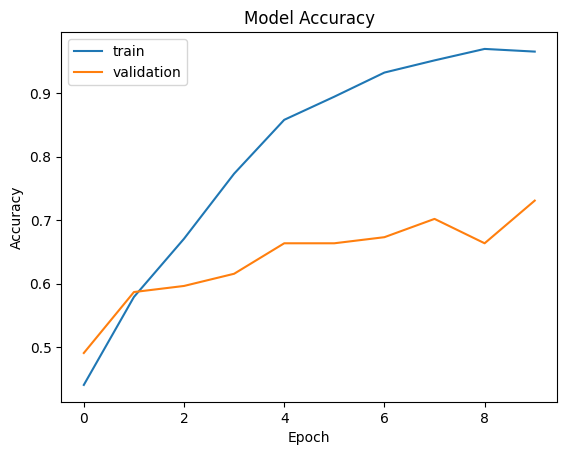

In [19]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

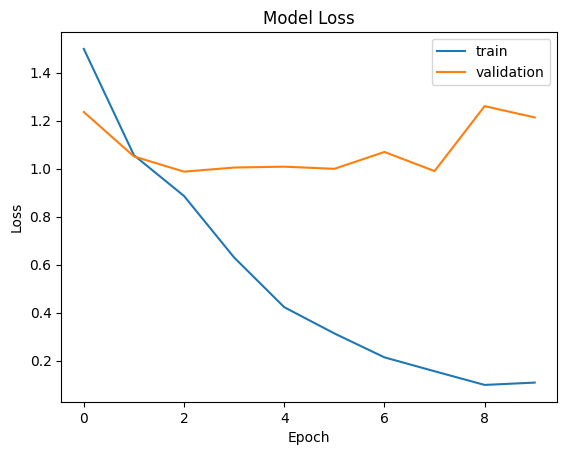

In [20]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [22]:
class_labels = {0: 'Daisy', 1: 'Dandelion', 2: 'Roses', 3: 'Sunflowers', 4: 'Tulips'}

In [34]:
def predict_flower_class(img_path):
    img = load_img(img_path, target_size=(img_width, img_height))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])
    plt.imshow(load_img(img_path))
    print(f"Predicted Flower: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Flower: Daisy


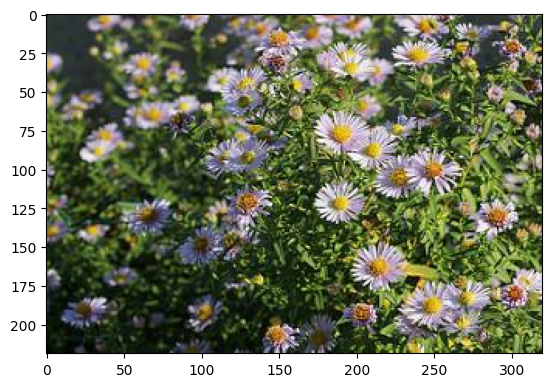

In [35]:
predict_flower_class(r"C:\Users\Mayuri\OneDrive\Desktop\DL\flowers\train\daisy\daisy_439.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Flower: Tulips


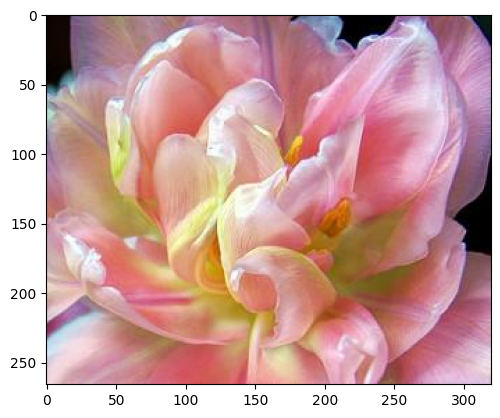

In [36]:
predict_flower_class(r"C:\Users\Mayuri\OneDrive\Desktop\DL\flowers\train\tulips\tulips_17.jpg")